In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz # si alguna libreria no esta instalada en anaconda
#conda install nombre de la libreria
#conda install graphviz
#conda install python-graphviz
import matplotlib.pyplot as pit
import numpy as np

In [38]:
iris=load_iris()
X_train, X_test,Y_train, Y_test= train_test_split(iris.data,iris.target)

In [39]:
arbol=DecisionTreeClassifier()
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
print(arbol.score(X_test,Y_test))
print(arbol.score(X_train,Y_train))

1.0
1.0


In [41]:
export_graphviz(arbol,out_file='Arbol.dot',class_names=iris.target_names,feature_names=iris.feature_names,impurity=False,filled=True)

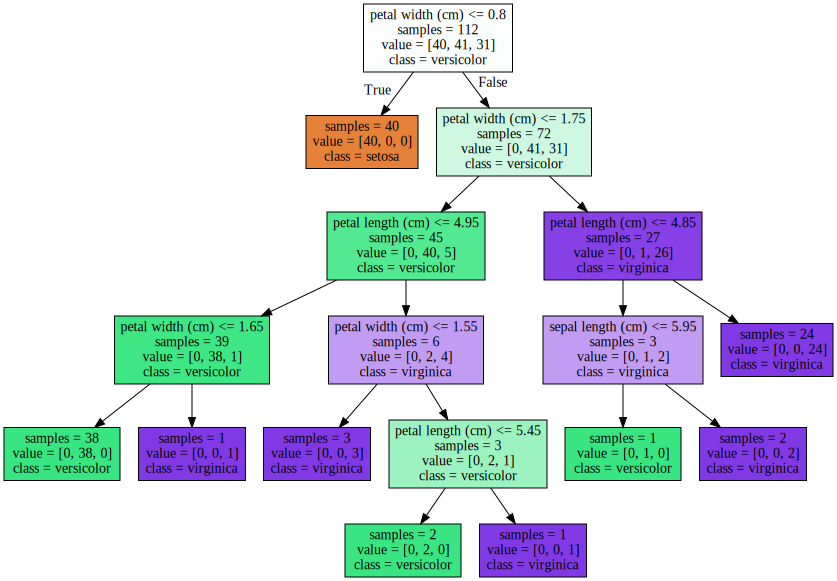

In [42]:
with open('Arbol.dot')as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

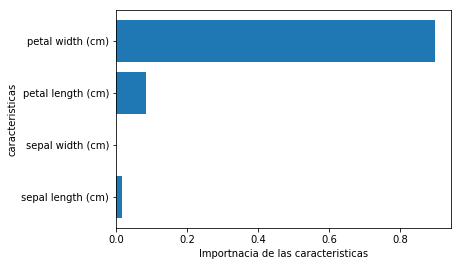

In [45]:
caract=iris.data.shape[1]
pit.barh(range(caract),arbol.feature_importances_)
pit.yticks(np.arange(caract),iris.feature_names)
pit.xlabel('Importnacia de las caracteristicas')
pit.ylabel('caracteristicas')
pit.show()

In [46]:
arbol=DecisionTreeClassifier(max_depth=3)

In [47]:
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
arbol.score(X_train,Y_train)

0.9642857142857143

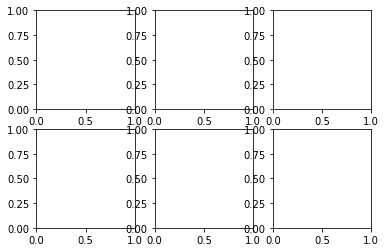

In [51]:
n_clases=3
plot_colors='bry'
plot_step=0.02
for pairidx,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    X=iris.data[:,pair]
    y=iris.target
    clf=DecisionTreeClassifier(max_depth=3).fit(X,y)
    pit.subplot(2,3,pairidx+1)
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,0].min()-1,X[:,0].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,plot_step),np.arange(y_min,y_max,plot_step))
    #hasta aqui por el momento
    # referencias https://www.youtube.com/watch?v=269QJ5joMCc